In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from asgn1.data_utils import load_CIFAR10

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [6]:
cifar10_dir = 'datasets/cifar-10-batches-py/'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [7]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape


(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


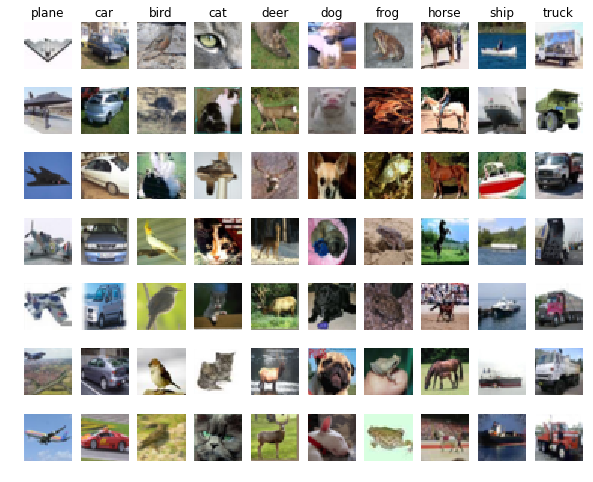

In [15]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
sample_per_class = 7

for y,cls in enumerate(classes):
    idxs = np.flatnonzero(y_train==y)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i,idx in enumerate(idxs):
        plt_idx = i*num_classes+y+1
        plt.subplot(sample_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)


In [6]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [7]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape


Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [8]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print 'Training data shape: ', X_train.shape
print 'Validation data shape: ', X_val.shape
print 'Test data shape: ', X_test.shape
print 'dev data shape: ', X_dev.shape

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[ 130.64189796  135.98173469  132.47391837  130.05569388  135.34804082
  131.75402041  130.96055102  136.14328571  132.47636735  131.48467347]


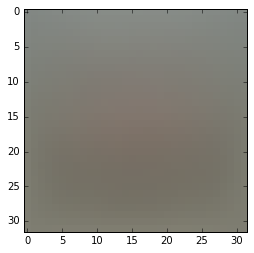

In [9]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print mean_image[:10] # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [10]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [11]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print X_train.shape, X_val.shape, X_test.shape, X_dev.shape

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [12]:
# Evaluate the naive implementation of the loss we provided for you:
from asgn1.classifiers.linear_svm import svm_loss_naive
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.00001)
print 'loss: %f' % (loss, )

loss: 9.238531


In [19]:
scores = X_dev.dot(W)

In [20]:
scores

array([[ -1.52822654e-01,  -6.11938516e-01,   5.33026939e-02, ...,
          1.47648644e-01,   2.83036717e-01,  -5.23471882e-02],
       [  2.31444095e-01,   1.66528816e-01,  -1.07529742e-01, ...,
         -8.89673049e-02,   1.70783316e-01,   2.12963921e-01],
       [  2.41189755e-01,   5.89013357e-01,   1.36612075e-01, ...,
         -2.92834590e-02,  -2.79288949e-01,  -1.50971766e-01],
       ..., 
       [ -3.16629722e-01,   2.93264535e-02,   1.87244414e-02, ...,
         -5.18789609e-02,  -2.77250833e-01,  -4.15567941e-04],
       [ -6.54011150e-01,   3.67743074e-01,   4.07099738e-01, ...,
          2.68868764e-01,  -2.94458326e-01,  -7.57560401e-02],
       [  3.39000279e-01,   1.86872240e-01,   1.77372543e-01, ...,
          5.96907239e-01,  -8.36057996e-01,   9.94835745e-02]])

In [21]:
y_dev

array([1, 6, 7, 1, 6, 4, 6, 1, 9, 4, 5, 4, 4, 6, 8, 8, 6, 3, 6, 8, 3, 5, 7,
       2, 0, 8, 2, 8, 2, 2, 1, 7, 1, 1, 2, 8, 9, 6, 7, 3, 8, 2, 7, 5, 4, 5,
       0, 3, 1, 6, 7, 6, 2, 5, 4, 1, 1, 9, 8, 2, 1, 6, 8, 6, 6, 9, 1, 4, 0,
       4, 7, 4, 2, 0, 6, 6, 2, 6, 1, 1, 6, 2, 0, 5, 8, 5, 5, 4, 4, 2, 3, 7,
       0, 5, 5, 2, 0, 8, 4, 8, 7, 6, 1, 6, 6, 7, 1, 8, 0, 0, 4, 5, 4, 8, 8,
       6, 5, 8, 4, 8, 8, 9, 2, 1, 5, 9, 5, 6, 8, 5, 5, 8, 4, 9, 9, 8, 2, 7,
       4, 2, 5, 7, 5, 8, 3, 0, 7, 5, 4, 4, 4, 0, 5, 1, 1, 2, 7, 2, 8, 4, 3,
       0, 9, 6, 9, 8, 8, 3, 0, 0, 3, 7, 0, 8, 6, 5, 2, 3, 2, 4, 9, 8, 2, 1,
       1, 8, 6, 8, 0, 7, 6, 2, 0, 1, 1, 3, 0, 5, 9, 3, 7, 9, 3, 5, 0, 7, 0,
       7, 7, 7, 4, 9, 4, 5, 7, 6, 0, 7, 0, 7, 9, 2, 0, 4, 3, 0, 6, 1, 5, 5,
       6, 9, 8, 5, 9, 3, 4, 6, 8, 4, 7, 9, 1, 7, 7, 0, 4, 5, 9, 0, 4, 5, 3,
       3, 0, 5, 9, 0, 1, 9, 0, 7, 4, 5, 2, 9, 6, 5, 3, 2, 0, 6, 1, 8, 5, 0,
       4, 9, 0, 1, 1, 2, 2, 8, 6, 0, 7, 5, 0, 2, 5, 3, 3, 9, 8, 8, 1, 1, 6,
       7, 0,

In [24]:
scores[np.arange(500),y_dev].shape

(500,)

In [28]:
X = X_dev
y = y_dev
loss = 0.0
dW = np.zeros(W.shape) # initialize the gradient as zero
delta = 1.0
num_train = X.shape[0]
  #############################################################################
  # TODO:                                                                     #
  # Implement a vectorized version of the structured SVM loss, storing the    #
  # result in loss.                                                           #
  #############################################################################
scores = X.dot(W)
  
correct_class_scores = scores[np.arange(num_train),y]
  #print correct_class_scores,correct_class_scores.shape
margins = np.maximum(0, (scores.T - correct_class_scores + delta))
margins[y,np.arange(num_train)] = 0
   

In [53]:
magic = np.zeros(margins.shape)
magic[margins>0] = 1
print magic[:,1]
print y[1]
print margins.shape


[ 1.  1.  1.  1.  1.  1.  0.  1.  1.  1.]
6
(10, 500)


In [52]:
num_pos = np.sum(margins > 0, axis=1)
num_pos

array([431, 439, 444, 445, 445, 434, 435, 446, 414, 439])

In [62]:
dscores = np.zeros(scores.shape)
dscores[margins.T>0] = 1
dscores

array([[ 1.,  0.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  0.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  0.,  1.,  1.],
       [ 1.,  1.,  0., ...,  1.,  0.,  1.]])

In [70]:
  loss = 0.0
  dW = np.zeros(W.shape) # initialize the gradient as zero

  #############################################################################
  # Implement a vectorized version of the structured SVM loss, storing the    #
  # result in loss.                                                           #
  #############################################################################
  
  # Get dims
  D = X.shape[0]
  num_classes = W.shape[0]
  num_train = X.shape[1]
  scores = W.dot(X)

  # Construct correct_scores vector that is Dx1 (or 1xD) so we can subtract out
  # where we append the "true" scores: [W*X]_{y_1, 1}, [W*X]_{y_2, 2}, ..., [W*X]_{y_D, D}
  # Using advanced indexing into scores: http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
  # Slow, sadly:
  # correct_scores = np.diag(scores[y,:])
  # Fast (index in both directions):
  correct_scores = scores[y, np.arange(num_train)] # using the fact that all elements in y are < C == num_classes

  mat = scores - correct_scores + 1 # like above, delta = 1
  mat[y, np.arange(num_train)] = 0 # accounting for the j=y_i term we shouldn't count (subtracting 1 makes up for it since w_j = w_{y_j} in this case)
  
  # Compute max
  thresh = np.maximum(np.zeros((num_classes,num_train)), mat)

  # Compute loss as double sum
  loss = np.sum(thresh)
  loss /= num_train

  # Add regularization
  loss += 0.5 * reg * np.sum(W * W)

  #############################################################################
  # Implement a vectorized version of the gradient for the structured SVM     #
  # loss, storing the result in dW.                                           #
  #                                                                           #
  # Hint: Instead of computing the gradient from scratch, it may be easier    #
  # to reuse some of the intermediate values that you used to compute the     #
  # loss.                                                                     #
  #############################################################################

  # Binarize into integers
  binary = thresh
  binary[thresh > 0] = 1

  # Perform the two operations simultaneously
  # (1) for all j: dW[j,:] = sum_{i, j produces positive margin with i} X[:,i].T
  # (2) for all i: dW[y[i],:] = sum_{j != y_i, j produces positive margin with i} -X[:,i].T
  col_sum = np.sum(binary, axis=0)
  binary[y, range(num_train)] = -col_sum[range(num_train)]
  dW = np.dot(binary, X.T)

  # Divide
  dW /= num_train

  # Regularize
  dW += reg*W

  return loss, dW


ValueError: shapes (3073,10) and (500,3073) not aligned: 10 (dim 1) != 500 (dim 0)

In [69]:
np.random.choice(np.arange(X.shape[0]), 200, replace = True)


array([388, 143, 430, 337, 130, 415, 429, 344, 301, 398, 448,   9, 213,
       408, 321,  11, 405, 120, 215, 270,  42, 311, 259, 271,  91,  71,
       236, 298, 353, 467, 304, 322, 251, 325,   0, 134, 393, 241,  76,
        71, 398, 192, 381, 304, 239, 407, 184, 140,  45, 358, 432, 298,
       333,  43, 456, 370, 487,  87, 339, 421, 441, 194, 403, 156, 343,
       475, 211, 216, 424, 123,  94, 412,  10,  20, 333, 258, 279, 138,
       228,  56, 478, 285,  34, 437, 267, 350, 127, 384, 205, 339, 113,
       261, 351, 440, 401, 243, 350, 456, 157, 499, 220, 344,  92, 380,
       473,  68, 338, 121,  21, 407, 406, 250, 259, 483, 394, 234,  70,
       350, 143, 227, 313, 133, 360, 217, 203, 221,  87, 334, 217, 313,
        98,  36,  34, 411, 261, 294,  49, 159, 285, 193, 326, 487, 115,
       186,  14,  97, 171, 174, 456,  38,  49, 311, 224, 339, 320, 135,
       142,  73, 284, 321, 191, 381, 212, 195, 393, 453,  44, 271,   2,
        30, 349,  55,  72, 210, 490, 137,  25,  29, 482, 294,  3

In [71]:
X.shape

(500, 3073)

In [73]:
indices = np.random.choice(np.arange(500), 10, replace = True)

In [74]:
indices

array([362, 389, 237,  95, 396, 426, 264,  75, 445, 110])

In [76]:
X[indices,:].shape

(10, 3073)

In [77]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
  """
  Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
  it for the linear classifier. These are the same steps as we used for the
  SVM, but condensed to a single function.  
  """
  # Load the raw CIFAR-10 data
  cifar10_dir = 'datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]
  mask = np.random.choice(num_training, num_dev, replace=False)
  X_dev = X_train[mask]
  y_dev = y_train[mask]
  
  # Preprocessing: reshape the image data into rows
  X_train = np.reshape(X_train, (X_train.shape[0], -1))
  X_val = np.reshape(X_val, (X_val.shape[0], -1))
  X_test = np.reshape(X_test, (X_test.shape[0], -1))
  X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
  
  # Normalize the data: subtract the mean image
  mean_image = np.mean(X_train, axis = 0)
  X_train -= mean_image
  X_val -= mean_image
  X_test -= mean_image
  X_dev -= mean_image
  
  # add bias dimension and transform into columns
  X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
  X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
  X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
  X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
  
  return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape
print 'dev data shape: ', X_dev.shape
print 'dev labels shape: ', y_dev.shape

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


In [78]:
X_train.shape

(49000, 3073)

In [81]:
np.mean(X_train, axis = 0).shape

(3073,)